# ML - DL - Train/Validate/Test - Lauch

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [2]:
from sklearn import linear_model

In [3]:
! pip install -U scikit-learn  


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
dulieu = pd.read_csv("./data/data-RealEstateDataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/data-RealEstateDataset.csv'

In [ ]:
dulieu.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<Axes: >

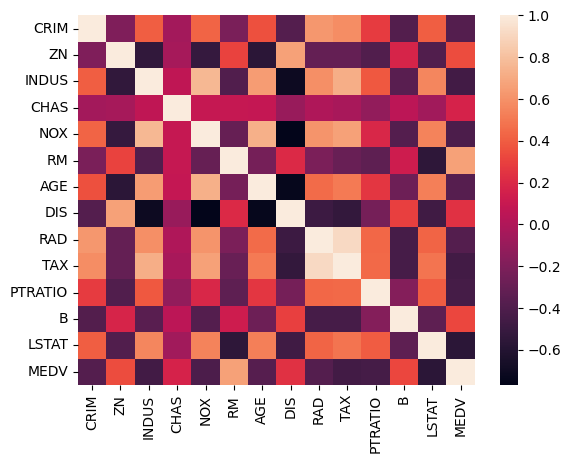

In [ ]:
sns.heatmap( dulieu.corr() )

In [ ]:
X = dulieu[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']]
y = dulieu['MEDV']

mohinh = linear_model.LinearRegression()
mohinh.fit(X, y)


LinearRegression()

In [ ]:
mohinh.coef_  ,  mohinh.intercept_

(array([-0.22816218,  0.0513729 , -0.37564782,  6.82303181, -5.75079824]),
 29.83373393488261)

In [ ]:
yPredict = mohinh.predict(X)

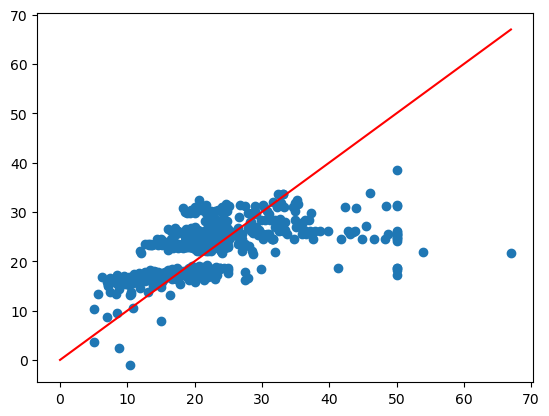

In [ ]:
plt.scatter(y, yPredict)

yx = [0, max(y.max(), yPredict.max())]
plt.plot( yx, yx,c="red" )

plt.show()

## TRain - Test split 

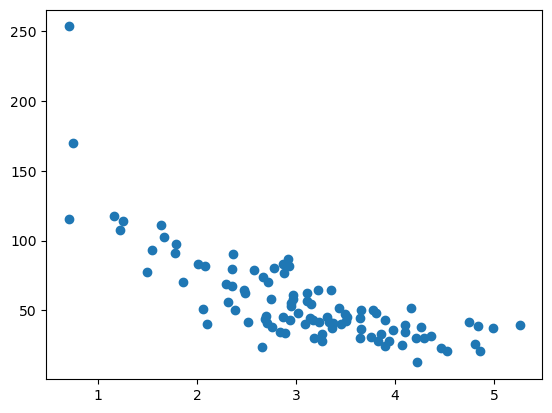

In [ ]:
x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

In [ ]:
## split 

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]  

train_x.shape , train_y.shape 


((80,), (80,))

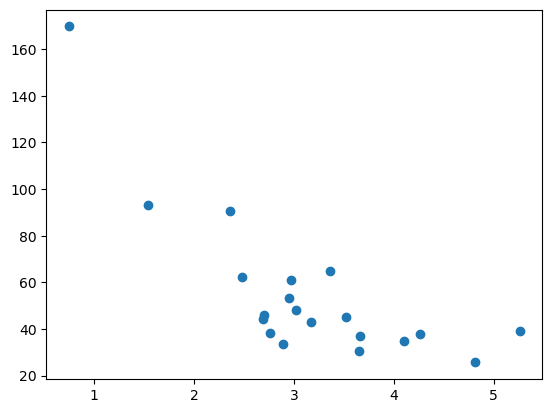

In [ ]:
plt.scatter(test_x, test_y)
plt.show()

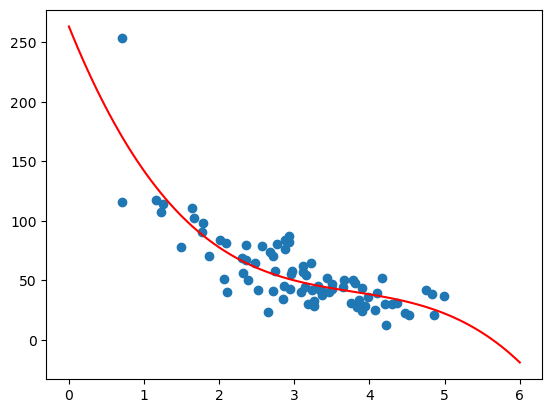

In [ ]:
mymodel = np.poly1d( np.polyfit(train_x, train_y, 3) )

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline), c="r")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_train = r2_score(train_y, mymodel(train_x))

r2_train 

0.707313056298672

In [ ]:
r2_test = r2_score(test_y, mymodel(test_x))

r2_test 

0.8561380933629432

## Tensorflow + Keras - Image Classify !!!
- pip install tensorflow  

In [ ]:
! pip install tensorflow


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# TensorFlow and tf.keras
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib

In [ ]:
data_dir = pathlib.Path(r"D:\BT\2433_Emerging_Technologies\data\Set_A\Set_A\Train")
data_dir

WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train')

In [ ]:
listImages = list(data_dir.glob('*/*.jpg'))

image_count = len(listImages)
print(image_count)
listImages

280


[WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/0 - Hoa sen/Hoa sen 001.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/0 - Hoa sen/Hoa sen 003.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/0 - Hoa sen/Hoa sen 004.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/0 - Hoa sen/Hoa sen 005.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/0 - Hoa sen/Hoa sen 006.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/0 - Hoa sen/Hoa sen 007.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/0 - Hoa sen/Hoa sen 008.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/0 - Hoa sen/Hoa sen 009.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/0 - Hoa sen/Hoa sen 010.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/0 - Hoa sen/Hoa sen 0

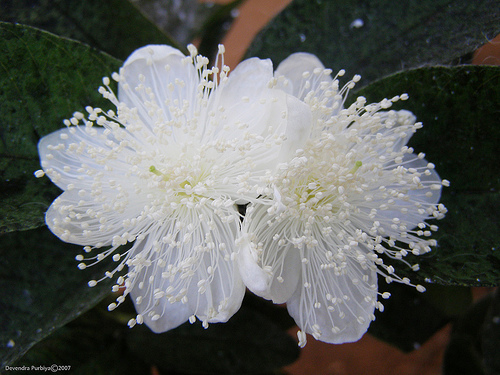

In [ ]:
PIL.Image.open(str(listImages[0]))

In [ ]:
# chuẩn hóa datatset 

batch_size = 16
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 291 files belonging to 21 classes.
Using 233 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 291 files belonging to 21 classes.
Using 58 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['0 - Hoa sen', '1 - Hoa hong', '10 - Hoa dam but', '11 - Hoa huong duong', '12 - Hong tu cau', '13 - Hoa oi', '14 - Hoa Tram Oi', '15 - Lan hac vy', '16 - Hoa ban', '17 - Hoa atiso', '18 - Tung tuyet mai', '19 - Hoa Phao Bong', '2 - Hoa nhai', '20 - Hoa long den', '3 - Hoa mai', '4 - Hoa anh dao', '5 - Hoa man', '6 - Hoa do quyen', '7 - Hoa sao nhai', '8 - Hoa thuoc duoc', '9 - Hoa sung']


Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


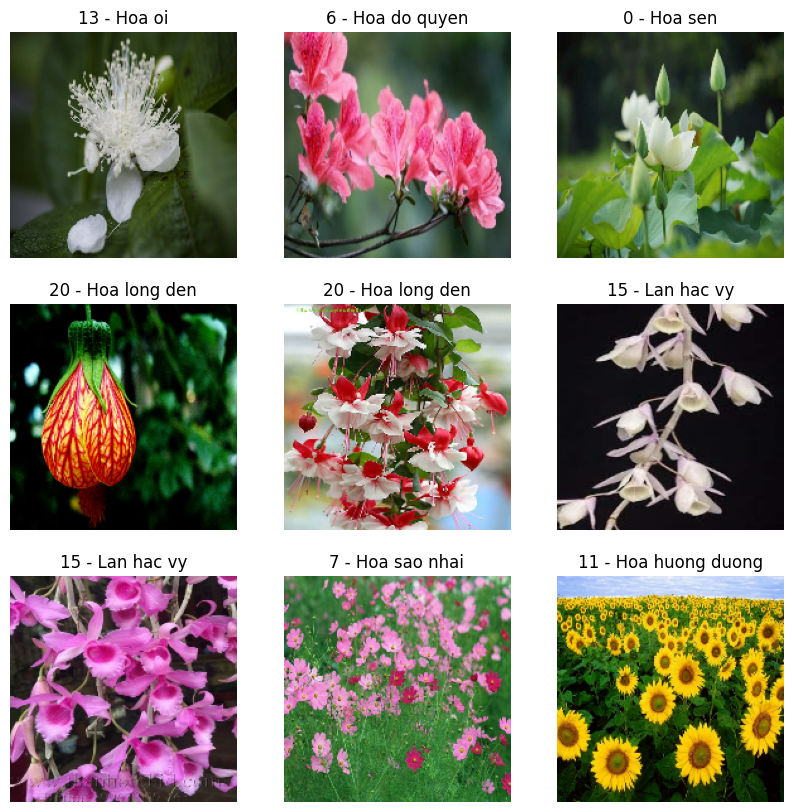

In [ ]:
plt.figure(figsize=(10, 10))
train_ds = train_ds.apply(tf.data.experimental.ignore_errors())
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
## Dựng Model 

# output
num_classes = len(class_names)

# khai báo các Layers
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# tạo model ở trên 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │         2,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,974,049 (45.68 MB)

 Trainable params: 3,991,349 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,982,700 (30.45 MB)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.0276 - loss: 3.1309 - val_accuracy: 0.1207 - val_loss: 3.0417


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1303 - loss: 2.9786 - val_accuracy: 0.0517 - val_loss: 3.0472
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1446 - loss: 2.9620 - val_accuracy: 0.1207 - val_loss: 2.9894
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1287 - loss: 2.8323 - val_accuracy: 0.1552 - val_loss: 2.8389
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2107 - loss: 2.5120 - val_accuracy: 0.1379 - val_loss: 2.8587
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3786 - loss: 2.2960 - val_accuracy: 0.3448 - val_loss: 2.6091
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5473 - loss: 1.8247 - val_accuracy: 0.1552 - val_loss: 3.0373
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6495 - loss: 1.4755 - val_accuracy: 0.1897 - val_loss: 2.3514
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7443 - loss: 1.1596 - val_accuracy: 0.2759 - val_loss: 2.2888


In [ ]:

for i in range(len(listImages)):
    img = tf.keras.utils.load_img(
        listImages[i] , target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(i,
        "Predict {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
        , " ::REAL" , listImages[i]
    )



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0 Predict 0 - Hoa sen with a 88.12 percent confidence.  ::REAL D:\BT\2433_Emerging_Technologies\data\Set_A\Set_A\Train\0 - Hoa sen\Hoa sen 001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1 Predict 1 - Hoa hong with a 96.30 percent confidence.  ::REAL D:\BT\2433_Emerging_Technologies\data\Set_A\Set_A\Train\0 - Hoa sen\Hoa sen 003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2 Predict 0 - Hoa sen with a 89.89 percent confidence.  ::REAL D:\BT\2433_Emerging_Technologies\data\Set_A\Set_A\Train\0 - Hoa sen\Hoa sen 004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3 Predict 0 - Hoa sen with a 91.56 percent confidence.  ::REAL D:\BT\2433_Emerging_Technologies\data\Set_A\Set_A\Train\0 - Hoa sen\Hoa sen 005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4 Predict 1 - Hoa hong with a 93.63 percent confidence.  ::REAL D:\BT\2433_Emerging_Technologies\data\Set_A\Set_A\Train\0 - Hoa sen\Hoa sen 006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5 Predict 1 - Hoa hong with a 79.52